# Using game of thrones five books we will derive and explore the semantic properities of its words

In [2]:
from __future__ import absolute_import, division, print_function
import codecs
import numpy as np
import pandas as pd
import gensim.models.word2vec as w2v
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import glob
import re
import multiprocessing
import sklearn.manifold
import os
import logging
from nltk.corpus import stopwords
stopWords = set(stopwords.words("english"))

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set up logging 

In [4]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Download NLTK tokenizer models 

In [5]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/ravi-pc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ravi-
[nltk_data]     pc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
book_filenames = sorted(glob.glob("data/*txt"))

In [7]:
print(book_filenames)

['data/got1.txt', 'data/got2.txt', 'data/got3.txt', 'data/got4.txt', 'data/got5.txt']


# Combine the books into one string

In [8]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'data/got1.txt'...
Corpus is now 1770659 characters long

Reading 'data/got2.txt'...
Corpus is now 4071041 characters long

Reading 'data/got3.txt'...
Corpus is now 6391405 characters long

Reading 'data/got4.txt'...
Corpus is now 8107945 characters long

Reading 'data/got5.txt'...
Corpus is now 9719485 characters long



# Split the corpus into sentences

In [13]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)

In [14]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [15]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw).lower()
    words = clean.split()
    clean_words = [word for word in words if word not in stopWords]
    return clean_words

In [17]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

# Lets test the function

In [84]:
sentence_to_wordlist("This is a Test")

['test']

# Before and after the clean

In [19]:
print(raw_sentences[19])
print(sentence_to_wordlist(raw_sentences[19]))

old as he was, Cressen had never seen a comet half so bright, nor yet that color, that terrible color, the color of blood and flame and sunsets.
[u'old', u'cressen', u'never', u'seen', u'comet', u'half', u'bright', u'yet', u'color', u'terrible', u'color', u'color', u'blood', u'flame', u'sunsets']


In [20]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))


The book corpus contains 917,562 tokens


# Training Word2Vec Model

In [21]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
size = 300
# Minimum word count threshold.
min_count = 3
# Number of threads to run in parallel.
#more workers, faster we train
workers = multiprocessing.cpu_count()
# Context window length.
window = 7
# Downsample setting for frequent words.
#0 - 1e-5 is good for this
sample=1e-3
# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [27]:
thrones2vc = w2v.Word2Vec(size = size, sg = 1, min_count = min_count, workers = workers, window = window
             , sample = sample, seed = seed, iter=10)

In [28]:
thrones2vc.build_vocab(sentences)

2017-10-04 22:30:06,544 : INFO : collecting all words and their counts
2017-10-04 22:30:06,550 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-10-04 22:30:06,600 : INFO : PROGRESS: at sentence #10000, processed 70784 words, keeping 9060 word types
2017-10-04 22:30:06,632 : INFO : PROGRESS: at sentence #20000, processed 139816 words, keeping 11861 word types
2017-10-04 22:30:06,669 : INFO : PROGRESS: at sentence #30000, processed 210625 words, keeping 13912 word types
2017-10-04 22:30:06,712 : INFO : PROGRESS: at sentence #40000, processed 278456 words, keeping 15314 word types
2017-10-04 22:30:06,742 : INFO : PROGRESS: at sentence #50000, processed 343195 words, keeping 16444 word types
2017-10-04 22:30:06,802 : INFO : PROGRESS: at sentence #60000, processed 415524 words, keeping 17666 word types
2017-10-04 22:30:06,849 : INFO : PROGRESS: at sentence #70000, processed 488666 words, keeping 18774 word types
2017-10-04 22:30:06,893 : INFO : PROGRESS: at se

In [29]:
print("Word2Vec vocabulary length:", len(thrones2vc.wv.vocab))

Word2Vec vocabulary length: 14583


# Start Training, this might take a minute or two

In [32]:
thrones2vc.train(sentences, total_examples = thrones2vc.corpus_count, epochs = thrones2vc.iter)

2017-10-04 22:30:36,565 : INFO : training model with 4 workers on 14583 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-10-04 22:30:37,621 : INFO : PROGRESS: at 2.77% examples, 227617 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:38,645 : INFO : PROGRESS: at 5.87% examples, 244970 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:39,660 : INFO : PROGRESS: at 8.84% examples, 247149 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:40,665 : INFO : PROGRESS: at 11.88% examples, 254037 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:41,678 : INFO : PROGRESS: at 15.57% examples, 265327 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:42,680 : INFO : PROGRESS: at 18.86% examples, 268591 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:43,684 : INFO : PROGRESS: at 22.25% examples, 273601 words/s, in_qsize 8, out_qsize 0
2017-10-04 22:30:44,713 : INFO : PROGRESS: at 25.16% examples, 269500 words/s, in_qsize 7, out_qsize 0
2017-10-04 22:30:45,743 : INF

8755773

# Save to file so the model can be used later

In [33]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [36]:
thrones2vc.save(os.path.join("trained", "thrones2vec.w2v"))

2017-10-04 22:34:51,519 : INFO : saving Word2Vec object under trained/thrones2vec.w2v, separately None
2017-10-04 22:34:51,522 : INFO : not storing attribute syn0norm
2017-10-04 22:34:51,524 : INFO : not storing attribute cum_table
2017-10-04 22:34:52,032 : INFO : saved trained/thrones2vec.w2v


# Exploring the trained model

In [37]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vc.w2v"))


2017-10-04 22:35:35,327 : INFO : loading Word2Vec object from trained/thrones2vc.w2v
2017-10-04 22:35:35,915 : INFO : loading wv recursively from trained/thrones2vc.w2v.wv.* with mmap=None
2017-10-04 22:35:35,915 : INFO : setting ignored attribute syn0norm to None
2017-10-04 22:35:35,916 : INFO : setting ignored attribute cum_table to None
2017-10-04 22:35:35,916 : INFO : loaded trained/thrones2vc.w2v


# Compress the word vectors into 2D space and plot them


In [38]:
#my video - how to visualize a dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)


In [41]:
all_word_vectors_matrix = thrones2vec.wv.syn0

# Training Tsne model, can take a while depending upon the machine its run

In [42]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)


# Plotting all the words

In [45]:

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [83]:
points.head(10)
points[points['word'] == 'Arya']

,word,x,y
8859,Arya,32.977848,-13.524578


In [47]:

sns.set_context("poster")

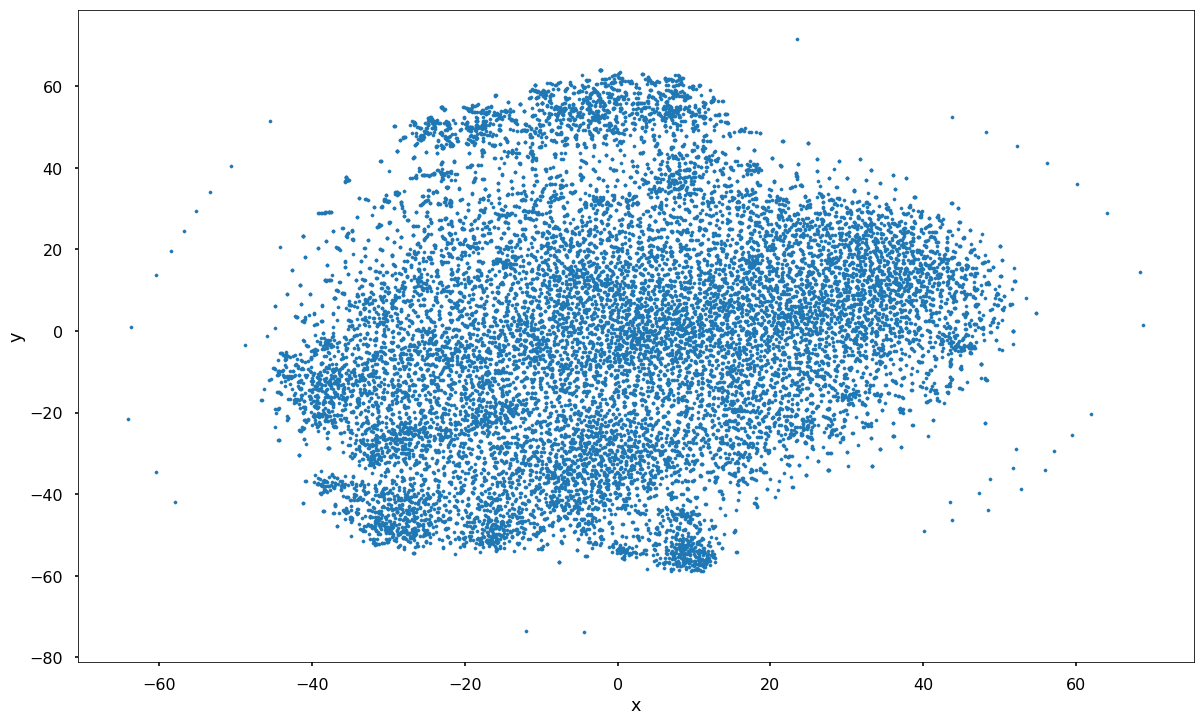

In [48]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

# Zoom in to some interesting places

In [49]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

# People related to Arya ended up together like sansa, nymeria and laena

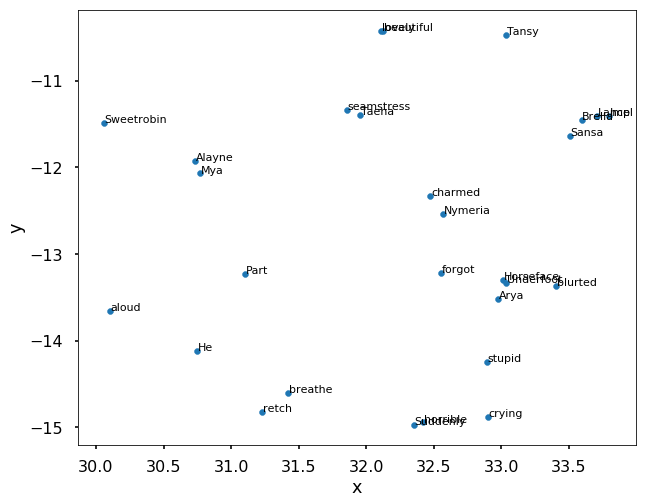

In [86]:
plot_region(x_bounds=(30, 34), y_bounds=(-15, -10))


# Food products are grouped nicely as well.

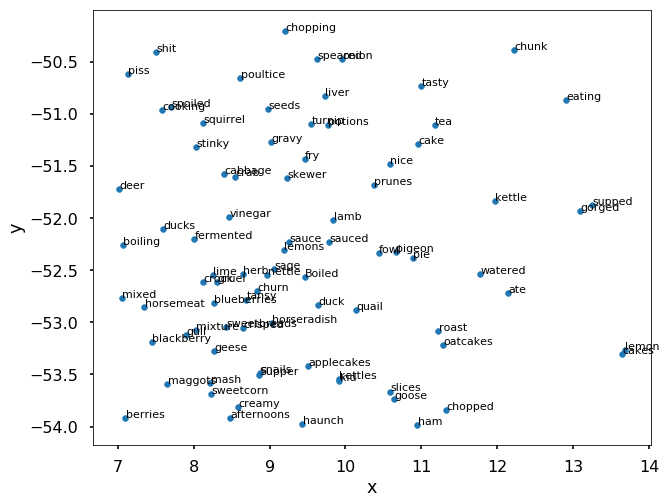

In [89]:
plot_region(x_bounds=(7, 15.0), y_bounds=(-54.0, -50.0))


# Explore semantic similarities between book characters
Words closest to the given word

In [73]:
thrones2vec.most_similar("Stark")

2017-10-04 22:58:40,528 : INFO : precomputing L2-norms of word weight vectors


[(u'Eddard', 0.6455620527267456),
 (u'executed', 0.5451408624649048),
 (u'Edrick', 0.4995206594467163),
 (u'Snowbeard', 0.48987215757369995),
 (u'Knelt', 0.48946481943130493),
 (u'Lyanna', 0.4860699772834778),
 (u'absently', 0.4859521985054016),
 (u'North', 0.483966201543808),
 (u'beheaded', 0.48284676671028137),
 (u'charmed', 0.4826316833496094)]

In [90]:
thrones2vec.most_similar("Aerys")

[(u'Jaehaerys', 0.6803133487701416),
 (u'II', 0.6499344110488892),
 (u'Conciliator', 0.6157970428466797),
 (u'Mad', 0.6012247800827026),
 (u'Maekar', 0.5882756114006042),
 (u'Cruel', 0.5861457586288452),
 (u'Defiance', 0.5770479440689087),
 (u'fullness', 0.5765713453292847),
 (u'appointment', 0.5763942003250122),
 (u'Daeron', 0.5740941762924194)]

In [91]:
thrones2vec.most_similar("direwolf")

[(u'wolf', 0.6065484285354614),
 (u'SHAGGYDOG', 0.5904223918914795),
 (u'pup', 0.5556087493896484),
 (u'Ghost', 0.5480943322181702),
 (u'GHOST', 0.5299808979034424),
 (u'OSHA', 0.5165872573852539),
 (u'muzzle', 0.5128607749938965),
 (u'Shaggydog', 0.5022257566452026),
 (u'Rickon', 0.500801682472229),
 (u'RICKON', 0.48841845989227295)]

# Linear relationships between word pairs

In [92]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2


In [93]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")


Stark is related to Winterfell, as Tully is related to Riverrun


u'Tully'

In [94]:
nearest_similarity_cosmul("Jaime", "sword", "wine")


Jaime is related to sword, as strongwine is related to wine


u'strongwine'

In [95]:
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Arya is related to Nymeria, as prophecies is related to dragons


u'prophecies'